#Ogólna charakterystyka projektu

Projekt opiera się na danych pobranych ze strony justjoin.it, która jest serwisem z ofertami pracy dla branży IT.

Celem projektu jest rozwiązanie problemu, który dotyczy braku podanych wynagrodzeń w około 30% ofert pracy.

Rozwiązaniem problemu jest stworzenie modelu predykcyjnego, który nauczy się przewidywać próg wynagrodzenia (wynagrodzenie 'niskie', 'poniżej średniej', 'średnie', 'powyżej średniej', 'wysokie') na podstawie wymaganych umiejętności oraz ich poziomu.

#Import bibliotek

In [ ]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import numpy as np
import json

#Pobieranie / wczytywanie danych

In [ ]:
#Instrukcja służąca do pobrania aktualnych danych ze strony justjoin.it
"""
http_address = f'https://justjoin.it/api/offers'

response = requests.get(http_address)
content = response.json()
"""

"\nhttp_address = f'https://justjoin.it/api/offers'\n\nresponse = requests.get(http_address)\ncontent = response.json()\n"

In [ ]:
#Pobraane dane możemy zapisać na późniejszy użytek
"""
with open('mydata.json', 'w') as f:
  json.dump(content, f)
"""

"\nwith open('mydata.json', 'w') as f:\n  json.dump(content, f)\n"

In [ ]:
#Wczytanie pobranych danych ze strony justjoin.it

f = open('mydata.json')
content = json.load(f)

#Podgląd struktury przykładowej oferty


In [ ]:
content[5]

{'title': 'Senior Magento Developer',
 'street': 'Korfantego 2',
 'city': 'Katowice',
 'country_code': 'PL',
 'address_text': 'Korfantego 2, Katowice',
 'marker_icon': 'php',
 'workplace_type': 'remote',
 'company_name': 'Tom&co.',
 'company_url': 'http://www.tomandco.pl',
 'company_size': '50+',
 'experience_level': 'senior',
 'latitude': '50.2617123',
 'longitude': '19.0219148',
 'published_at': '2023-01-30T09:39:00.000Z',
 'remote_interview': True,
 'open_to_hire_ukrainians': False,
 'id': 'tom-co-senior-magento-developer',
 'display_offer': True,
 'employment_types': [{'type': 'b2b',
   'salary': {'from': 16000, 'to': 22000, 'currency': 'pln'}}],
 'company_logo_url': 'https://bucket.justjoin.it/offers/company_logos/thumb/e08c50009097f35391194f59f7897e388715f401.jpg?1656315686',
 'skills': [{'name': 'Git', 'level': 4},
  {'name': 'Magento 2', 'level': 4},
  {'name': 'PHP', 'level': 4}],
 'remote': True,
 'multilocation': [{'city': 'Białystok',
   'slug': 'tom-co-senior-magento-devel

#Sprawdzenie liczby ofert

In [ ]:
len(content)

13943

#Sprawdzenie liczby popularnych markerów

In [ ]:
"""
Każdy marker identyfikuje zbiór ofert pracy ograniczony o tematykę danego markera.
Przykład I: Marker "data" identyfikuje oferty pracy związane z pracą na danych
Przykład II: Marker "testing" identyfikuje oferty pracy związane z pracą testera
"""

marker_icon_dict = {}

for offer in content:
  marker_icon_dict[offer['marker_icon']] = marker_icon_dict.get(offer['marker_icon'], 0) + 1

marker = pd.Series(marker_icon_dict, name='marker')

print(f'Liczba ofert wg markerów:\n')
marker.sort_values(ascending=False)[:50]

Liczba ofert wg markerów:



javascript      1821
java            1550
net             1166
devops          1128
testing         1021
data             858
php              716
python           654
pm               635
mobile           599
admin            554
analytics        507
c                502
support          371
erp              342
other            335
architecture     316
ux               259
security         200
ruby             113
game             104
go                96
scala             49
html              47
Name: marker, dtype: int64

In [ ]:
#Funkcja, dzięki której będziemy tworzyli listy ofert wg markerów

def markery(x):
  offers_by_marker = [offer for offer in content if offer['marker_icon'] == x]
  return offers_by_marker

#Wybór markera, wg którego będziemy opracowywać dane

In [ ]:
#Do zmiennej 'marker' przypisujemy nazwę markera z bazy:

marker = 'java'

offers_by_marker = (markery(marker))

skills_dict = {}

print(f'Liczba ofert z markerem "{marker}" jest równa: {len(offers_by_marker)}\n')

for offer in offers_by_marker:
  for skill in offer['skills']:
    skills_dict[skill['name']] = skills_dict.get(skill['name'], 0) + 1

skills = pd.Series(skills_dict, name='skill')

print(f'Spis głównych 30 umiejętności dla ofert oznaczonych jako "{marker}":\n')

skills.sort_values(ascending=False)[:30]

Liczba ofert z markerem "java" jest równa: 1550

Spis głównych 30 umiejętności dla ofert oznaczonych jako "java":



Java             1236
Spring            488
Spring Boot       408
Hibernate         144
English           133
SQL               117
Git                96
Scrum              89
Microservices      85
AWS                79
Docker             68
Kotlin             63
Java 11            63
JUnit              60
REST               56
JavaScript         54
Java 8             49
Angular            45
REST API           44
Java SE            43
Kafka              43
SaaS               42
Linux              34
Testing            32
Groovy             31
JPA                31
PaaS               31
Kubernetes         30
HTML               29
Maven              28
Name: skill, dtype: int64

In [ ]:
#Stworzenie listy z 30 popularnymi skillami pod dany marker na użytek 'df'

marker_skills = list(skills.sort_values(ascending=False)[:30].index)

In [ ]:
#Stworzenie listy, która zawiera słowniki zawierające nazwę skilla oraz poziom

offers_list = []

for offer in offers_by_marker:
  row_default = {skill: 0 for skill in marker_skills}

  for skill in offer['skills']:
    if skill['name'] in row_default.keys():
      row_default[skill['name']] = skill['level']

  offers_list.append(row_default)

In [ ]:
#Stworzenie df z nowymi danymi (skill / experience level)
df = pd.DataFrame(offers_list)

In [ ]:
"""
Podgląd wygenerowanego df z danymi zawierającymi nazwy umiejętności
oraz wymagany poziom umiejętności
"""

df

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,Kafka,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,5
1546,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,5
1547,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,5
1548,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(offers_list)

1550

In [ ]:
offers_by_marker[16]

{'title': 'Programista Java',
 'street': 'Gillette 11',
 'city': 'Łódź',
 'country_code': 'PL',
 'address_text': 'Gillette 11, Łódź',
 'marker_icon': 'java',
 'workplace_type': 'remote',
 'company_name': 'DOZ S.A.',
 'company_url': 'http://www.dozsa.pl/',
 'company_size': '1001-5000',
 'experience_level': 'mid',
 'latitude': '51.740544',
 'longitude': '19.368585',
 'published_at': '2023-01-29T15:00:10.865Z',
 'remote_interview': False,
 'open_to_hire_ukrainians': False,
 'id': 'doz-s-a-programista-java-lodz',
 'display_offer': True,
 'employment_types': [{'type': 'permanent', 'salary': None}],
 'company_logo_url': 'https://bucket.justjoin.it/offers/company_logos/thumb/cd5a3de221b91f0a9df8c054a2b5502b7ce14d3d.jpg?1673965527',
 'skills': [{'name': 'MySQL', 'level': 3},
  {'name': 'SQL', 'level': 3},
  {'name': 'Java', 'level': 3}],
 'remote': True,
 'multilocation': [{'city': 'Konstantynów Łódzki',
   'slug': 'doz-s-a-programista-java-konstantynow-lodzki',
   'street': 'Centrum'},
  {'ci

In [ ]:
#Stworzenie listy z ofertami wynagrodzenia

salary = []

for offer in offers_by_marker:
  salary.append(offer['employment_types'])

In [ ]:
#Podgląd 20 recordów z wynagrodzeniem
salary[:20]

[[{'type': 'b2b', 'salary': {'from': 10800, 'to': 16800, 'currency': 'pln'}}],
 [{'type': 'b2b', 'salary': {'from': 16800, 'to': 23500, 'currency': 'pln'}}],
 [{'type': 'b2b', 'salary': {'from': 17000, 'to': 28560, 'currency': 'pln'}},
  {'type': 'permanent',
   'salary': {'from': 12900, 'to': 20500, 'currency': 'pln'}}],
 [{'type': 'permanent', 'salary': None}, {'type': 'b2b', 'salary': None}],
 [{'type': 'b2b', 'salary': {'from': 30500, 'to': 36800, 'currency': 'pln'}}],
 [{'type': 'b2b', 'salary': None}],
 [{'type': 'b2b', 'salary': None}],
 [{'type': 'b2b', 'salary': {'from': 18000, 'to': 25000, 'currency': 'pln'}},
  {'type': 'permanent',
   'salary': {'from': 15000, 'to': 21000, 'currency': 'pln'}}],
 [{'type': 'permanent', 'salary': None}],
 [{'type': 'permanent',
   'salary': {'from': 17000, 'to': 21000, 'currency': 'pln'}}],
 [{'type': 'b2b', 'salary': {'from': 20000, 'to': 24000, 'currency': 'pln'}}],
 [{'type': 'b2b', 'salary': None}],
 [{'type': 'b2b', 'salary': {'from': 38

In [ ]:
#Sprawdzenie, czy długość listy 'salary' odpowiada liczbie ofert z danego markera
len(salary)

1550

In [ ]:
df2 = pd.DataFrame(salary)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1550 non-null   object
 1   1       555 non-null    object
dtypes: object(2)
memory usage: 24.3+ KB


In [ ]:
df2[:25]

,0,1
0,"{'type': 'b2b', 'salary': {'from': 10800, 'to'...",None
1,"{'type': 'b2b', 'salary': {'from': 16800, 'to'...",None
2,"{'type': 'b2b', 'salary': {'from': 17000, 'to'...","{'type': 'permanent', 'salary': {'from': 12900..."
3,"{'type': 'permanent', 'salary': None}","{'type': 'b2b', 'salary': None}"
4,"{'type': 'b2b', 'salary': {'from': 30500, 'to'...",None
5,"{'type': 'b2b', 'salary': None}",None
6,"{'type': 'b2b', 'salary': None}",None
7,"{'type': 'b2b', 'salary': {'from': 18000, 'to'...","{'type': 'permanent', 'salary': {'from': 15000..."
8,"{'type': 'permanent', 'salary': None}",None
9,"{'type': 'permanent', 'salary': {'from': 17000...",None


In [ ]:
"""
Każda oferta posiada dwa miejsca na formę zatrudnienia.
Na potrzeby projektu uśrednimy wynagrodzenie z dwóch form wynagrodzenia.
Pierwszy krok to stworzenie dwóch list. Każda lista to jeden wariant zatrudnienia.

Możliwe kombinacje:

Zatrudnienie 1: jest - Zatrudnienie 2: brak
Zatrudnienie 1: jest - Zatrudnienie 2: jest
Zatrudnienie 1: brak - Zatrudnienie 2: brak
"""

list_salary_1 = df2[0].tolist()
list_salary_2 = df2[1].tolist()

In [ ]:
list_salary_1[26]

{'type': 'b2b', 'salary': {'from': 14600, 'to': 25200, 'currency': 'pln'}}

#Stworzenie DataFrame'ów z zarobkami i walutą

In [ ]:
#Stworzenie pierwszej listy z walutą

list_currency_1 = []

for record in list_salary_1:
  try:
    list_currency_1.append(record['salary']['currency'])
  except:
    list_currency_1.append(0)

In [ ]:
df_currency_1 = pd.DataFrame(list_currency_1)

In [ ]:
#Stworzenie drugiej listy z walutą

list_currency_2 = []

for record in list_salary_2:
  try:
    list_currency_2.append(record['salary']['currency'])
  except:
    list_currency_2.append(0)

In [ ]:
df_currency_2 = pd.DataFrame(list_currency_2)

#Stworzenie DataFrame z zarobkami "od"

In [ ]:
#Stworzenie pierwszej listy z dolnym progiem wynagrodzenia:

list_from_1 = []

for record in list_salary_1:
  if['salary'] != None:
    try:
      list_from_1.append(record['salary']['from'])
    except:
      list_from_1.append(0)

In [ ]:
df_from_1 = pd.DataFrame(list_from_1)

In [ ]:
#Stworzenie drugiej listy z dolnym progiem wynagrodzenia:

list_from_2 = []

for record in list_salary_2:
  if['salary'] != None:
    try:
      list_from_2.append(record['salary']['from'])
    except:
      list_from_2.append(0)

In [ ]:
df_from_2 = pd.DataFrame(list_from_2)

#Stworzenie DataFrame z zarobkami "do"

In [ ]:
#Stworzenie pierwszej listy z górnym progiem wynagrodzenia:

list_to_1 = []

for record in list_salary_1:
  try:
    list_to_1.append(record['salary']['to'])
  except:
    list_to_1.append(0)

In [ ]:
df_to_1 = pd.DataFrame(list_to_1)

In [ ]:
#Stworzenie drugiej listy z górnym progiem wynagrodzenia:

list_to_2 = []

for record in list_salary_2:
  try:
    list_to_2.append(record['salary']['to'])
  except:
    list_to_2.append(0)

In [ ]:
df_to_2 = pd.DataFrame(list_to_2)

#Uśrednienie widełek zarobków na liście zarobków I i II
Dla przypomnienia: list_salary_1 odpowiada jedenj formie zatrudnenia, a list_salary_2 odpowaida drugiej formie zatrudnienia

In [ ]:
#Pierwszy krok to sumowanie wartości "od" i "do"

sum_element_1 = [list_from_1[x] + list_to_1[x] for x in range (len(list_from_1))]
sum_element_2 = [list_from_2[x] + list_to_2[x] for x in range (len(list_from_2))]

In [ ]:
#Drugi krok to uśrednienie widełek wynagrodzenia i stworzenie df

mean_element_1 = [(x / 2) for x in sum_element_1]
mean_element_2 = [(x / 2) for x in sum_element_2]

df_mean_element_1 = pd.DataFrame(mean_element_1)
df_mean_element_2 = pd.DataFrame(mean_element_2)

In [ ]:
#Stworzenie DataFrame ze średnią wynagrodzeń z dwóch list
mean_salary = [mean_element_1[x] + mean_element_2[x] for x in range (len(mean_element_1))]

#Dodanie do df ze skillami nowych kolumn:

In [ ]:
#Dodanie nowych kolumn z przeprocesowanymi danymi
df_result_1 = pd.concat([df, df_mean_element_1, df_mean_element_2, df_currency_1, df_currency_2], axis=1, join="inner")

In [ ]:
#Nazwanie nowych kolumn z danymi
df_result_1.columns.values[-1] = 'Waluta_2'
df_result_1.columns.values[-2] = 'Waluta_1'
df_result_1.columns.values[-3] = 'Mean_2'
df_result_1.columns.values[-4] = 'Mean_1'

In [ ]:
#Stworzenie nowej kolumny, która sumuje zarobki z obu df
df_result_1['Mean_Final'] = df_result_1['Mean_2'] + df_result_1['Mean_1']

In [ ]:
#Przygotowanie nowej kolumny, w której uśrednimy zarobki z obu form zatrudnienia
df_result_1['Mean_Final_2'] = 0

In [ ]:
#Uśrednienie wyników w kolumnie z zarobkami "Mean_Final_2"
for n in range(len(df_result_1)):
  if df_result_1.iloc[n, -5] == 0:
    df_result_1.iloc[n, -1] = df_result_1.iloc[n, -2] / 1
  elif df_result_1.iloc[n, -5] != 0:
    df_result_1.iloc[n, -1] = df_result_1.iloc[n, -2] / 2

In [ ]:
df_result_1[:30]

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,PaaS,Kubernetes,HTML,Maven,Mean_1,Mean_2,Waluta_1,Waluta_2,Mean_Final,Mean_Final_2
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,13800.0,0.0,pln,0,13800.0,13800.0
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,20150.0,0.0,pln,0,20150.0,20150.0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,22780.0,16700.0,pln,pln,39480.0,19740.0
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,33650.0,0.0,pln,0,33650.0,33650.0
5,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
6,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
7,4,3,0,0,4,0,0,0,0,0,...,0,0,0,0,21500.0,18000.0,pln,pln,39500.0,19750.0
8,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
9,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,19000.0,0.0,pln,0,19000.0,19000.0


#Przewalutowanie wynagrodzeń do PLN

In [ ]:
#Sprawdzenie, jakie waluty występują
waluty = []

for n in df_result_1['Waluta_1']:
  if n not in waluty:
    waluty.append(n)
print(f'Waluty w ofertach: {waluty}')

Waluty w ofertach: ['pln', 0, 'eur', 'usd', 'gbp']


In [ ]:
df_result_1[:25]

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,PaaS,Kubernetes,HTML,Maven,Mean_1,Mean_2,Waluta_1,Waluta_2,Mean_Final,Mean_Final_2
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,13800.0,0.0,pln,0,13800.0,13800.0
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,20150.0,0.0,pln,0,20150.0,20150.0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,22780.0,16700.0,pln,pln,39480.0,19740.0
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,33650.0,0.0,pln,0,33650.0,33650.0
5,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
6,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
7,4,3,0,0,4,0,0,0,0,0,...,0,0,0,0,21500.0,18000.0,pln,pln,39500.0,19750.0
8,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
9,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,19000.0,0.0,pln,0,19000.0,19000.0


In [ ]:
#Przewalutowanie
for n in range(len(df_result_1)):
  if (df_result_1.iloc[n, -4] or df_result_1.iloc[n, -3]) == 'eur':
    df_result_1.iloc[n, -1] = (df_result_1.iloc[n, -1]) * 4.71
  elif (df_result_1.iloc[n, -4] or df_result_1.iloc[n, -3]) == 'usd':
    df_result_1.iloc[n, -1] = (df_result_1.iloc[n, -1]) * 4.35
  elif (df_result_1.iloc[n, -4] or df_result_1.iloc[n, -3]) == 'gbp':
    df_result_1.iloc[n, -1] = (df_result_1.iloc[n, -1]) * 5.32
  elif (df_result_1.iloc[n, -4] or df_result_1.iloc[n, -3]) == 'chf':
    df_result_1.iloc[n, -1] = (df_result_1.iloc[n, -1]) * 4.75
  elif (df_result_1.iloc[n, -4] or df_result_1.iloc[n, -3]) == 'pln':
    df_result_1.iloc[n, -1] = (df_result_1.iloc[n, -1]) * 1.00

In [ ]:
df_result_1

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,PaaS,Kubernetes,HTML,Maven,Mean_1,Mean_2,Waluta_1,Waluta_2,Mean_Final,Mean_Final_2
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,13800.0,0.0,pln,0,13800.0,13800.0
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,20150.0,0.0,pln,0,20150.0,20150.0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,22780.0,16700.0,pln,pln,39480.0,19740.0
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,0.0
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,33650.0,0.0,pln,0,33650.0,33650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,5,0,0,0,0,0,0,0,0,0,...,0,0,0,5,21500.0,0.0,pln,0,21500.0,21500.0
1546,5,0,0,0,0,0,0,0,0,0,...,0,0,0,5,21500.0,0.0,pln,0,21500.0,21500.0
1547,5,0,0,0,0,0,0,0,0,0,...,0,0,0,5,21500.0,0.0,pln,0,21500.0,21500.0
1548,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,25620.0,0.0,pln,0,25620.0,25620.0


#Czyszczenie danych

In [ ]:
#Usunięcie niepotrzebnych kolumn
df_pre_clear = df_result_1.drop(['Waluta_1','Waluta_2', 'Mean_Final', 'Waluta_1', 'Waluta_2', 'Mean_1', 'Mean_2'], axis=1)

In [ ]:
df_pre_clear

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven,Mean_Final_2
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13800.0
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20150.0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19740.0
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,5,21500.0
1546,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,5,21500.0
1547,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,5,21500.0
1548,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25620.0


In [ ]:
"""
Tworzenie zbioru z danymi bez podanego wynagrodzenia
na użytek późniejszej przykładowej predykcji
"""

df_no_salary = df_pre_clear[df_pre_clear.Mean_Final_2 == 0]

In [ ]:
df_predict = df_no_salary.drop(['Mean_Final_2'], axis=1)

In [ ]:
df_predict

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,Kafka,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
8,5,5,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
11,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,3,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1512,3,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1513,3,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1525,3,3,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Usunięcie z głównego df rekordów bez wynagrodzenia
df_final = df_pre_clear[df_pre_clear.Mean_Final_2 != 0]

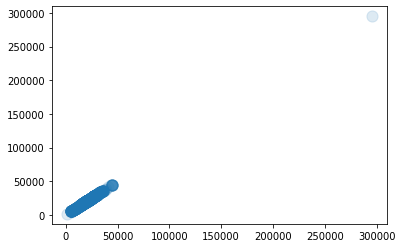

In [ ]:
#Sprawdzenie outliersów
plt.scatter(df_final['Mean_Final_2'], df_final['Mean_Final_2'], marker='.', alpha=0.15, s=500)

In [ ]:
#Pozbycie się outliersów
from scipy import stats
df_final_no_outliers = df_final[(np.abs(stats.zscore(df_final['Mean_Final_2'])) < 2)]

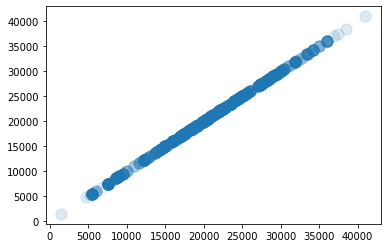

In [ ]:
plt.scatter(df_final_no_outliers['Mean_Final_2'], df_final_no_outliers['Mean_Final_2'], marker='.', alpha=0.15, s=500)

In [ ]:
df_final_no_outliers[:25]

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven,Mean_Final_2
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13800.000
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20150.000
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19740.000
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33650.000
7,4,3,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19750.000
9,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19000.000
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22000.000
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41000.000
13,0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12600.000
14,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,32740.000


#Dyskretyzacja danych wynagrodzenia

In [ ]:
df_final_no_outliers['Zarobki_Oczekiwane']=pd.cut(df_final_no_outliers['Mean_Final_2'],5,labels=['Niskie','Poniżej Średniej','Średnie','Powyżej Średniej','Wysokie'])

<ipython-input-1306-00135756017f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_no_outliers['Zarobki_Oczekiwane']=pd.cut(df_final_no_outliers['Mean_Final_2'],5,labels=['Niskie','Poniżej Średniej','Średnie','Powyżej Średniej','Wysokie'])


In [ ]:
df_final_no_salary = df_final_no_outliers.drop(['Mean_Final_2'], axis=1)

In [ ]:
df_final_no_salary

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven,Zarobki_Oczekiwane
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Poniżej Średniej
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Średnie
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Średnie
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wysokie
7,4,3,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Średnie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,5,Średnie
1546,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,5,Średnie
1547,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,5,Średnie
1548,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Powyżej Średniej


#Przygotowanie danych pod model predykcyjny

In [ ]:
#Wyznaczenie X i y

y = df_final_no_salary.pop('Zarobki_Oczekiwane')
X = df_final_no_salary

In [ ]:
y.value_counts()

Średnie             557
Powyżej Średniej    261
Poniżej Średniej    233
Niskie               87
Wysokie              41
Name: Zarobki_Oczekiwane, dtype: int64

In [ ]:
df_final_no_salary

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,Kafka,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven
0,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,3,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,5
1546,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,5
1547,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,5
1548,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Podział na zbiory testowe i treningowe

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
y

0       Poniżej Średniej
1                Średnie
2                Średnie
4                Wysokie
7                Średnie
              ...       
1545             Średnie
1546             Średnie
1547             Średnie
1548    Powyżej Średniej
1549              Niskie
Name: Zarobki_Oczekiwane, Length: 1179, dtype: category
Categories (5, object): ['Niskie' < 'Poniżej Średniej' < 'Średnie' < 'Powyżej Średniej' <
                         'Wysokie']

#GridSearch

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
#Poszukiwanie najlepszych paramterów dla klasyfikatora zespołowego

params = {'n_estimators': [2, 4, 8, 16, 20, 24, 32, 64],
          'max_depth': [24, 32, 36, 40, 64, 68, 72, 76, 80, 84, 100],
          'max_features': [2, 3, 4, 5, 6]}

gs = GridSearchCV(rfc, param_grid=params, cv=5)

In [ ]:
#Czas treningu: około 2 minut
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [24, 32, 36, 40, 64, 68, 72, 76, 80, 84,
                                       100],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [2, 4, 8, 16, 20, 24, 32, 64]})

In [ ]:
gs.best_estimator_

RandomForestClassifier(max_depth=64, max_features=5, n_estimators=16)

In [ ]:
gs.best_score_

0.8733179250128403

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=16,
                            max_depth=64,
                            max_features=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=64, max_features=5, n_estimators=16)

In [ ]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [ ]:
#Raport na zbiorach treningowych
print(classification_report(y_train, y_train_pred))

                  precision    recall  f1-score   support

          Niskie       1.00      1.00      1.00        65
Poniżej Średniej       0.88      0.91      0.89       175
Powyżej Średniej       0.87      0.95      0.91       196
         Wysokie       1.00      0.55      0.71        31
         Średnie       0.96      0.93      0.94       417

        accuracy                           0.92       884
       macro avg       0.94      0.87      0.89       884
    weighted avg       0.93      0.92      0.92       884



In [ ]:
#Raport na zbiorach testowych
print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

          Niskie       1.00      0.82      0.90        22
Poniżej Średniej       0.81      0.79      0.80        58
Powyżej Średniej       0.85      0.97      0.91        65
         Wysokie       1.00      0.50      0.67        10
         Średnie       0.89      0.90      0.90       140

        accuracy                           0.87       295
       macro avg       0.91      0.80      0.83       295
    weighted avg       0.88      0.87      0.87       295



In [ ]:
rfc.score(X_test, y_test)

0.8711864406779661

#Stworzenie modelu opartego na sieciach neuronowych

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
cls = MLPClassifier()

In [ ]:
#Sprawdzenie najlepszych parametrów

params = {'max_iter': [500, 1000, 1500],
          'hidden_layer_sizes': [(50, 25, 25),
                                 (50, 50, 50, 25),
                                 (100, 50),
                                 (100,50,50),
                                 (100, 50, 50, 50)],
          'batch_size': [128, 256]}

gs = GridSearchCV(cls, param_grid=params, cv=5)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
#Czas treningu: około 5 minut
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'batch_size': [128, 256],
                         'hidden_layer_sizes': [(50, 25, 25), (50, 50, 50, 25),
                                                (100, 50), (100, 50, 50),
                                                (100, 50, 50, 50)],
                         'max_iter': [500, 1000, 1500]})

In [ ]:
gs.best_estimator_

MLPClassifier(batch_size=128, hidden_layer_sizes=(100, 50, 50, 50),
              max_iter=500)

In [ ]:
gs.best_score_

0.8653954802259888

In [ ]:
from sklearn.neural_network import MLPClassifier

cls = MLPClassifier(max_iter=500,
                    activation = 'relu',
                    hidden_layer_sizes = (100, 50, 50, 50),
                    batch_size = 128,
                    learning_rate = 'adaptive')
cls.fit(X_train_sc, y_train)

MLPClassifier(batch_size=128, hidden_layer_sizes=(100, 50, 50, 50),
              learning_rate='adaptive', max_iter=500)

In [ ]:
y_train_pred = cls.predict(X_train_sc)
y_test_pred = cls.predict(X_test_sc)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Raport na zbiorach treningowych

print(classification_report(y_train, y_train_pred))

                  precision    recall  f1-score   support

          Niskie       1.00      1.00      1.00        65
Poniżej Średniej       0.90      0.88      0.89       175
Powyżej Średniej       0.87      0.95      0.91       196
         Wysokie       0.94      0.55      0.69        31
         Średnie       0.95      0.94      0.94       417

        accuracy                           0.92       884
       macro avg       0.93      0.86      0.89       884
    weighted avg       0.92      0.92      0.92       884



In [ ]:
#Raport na zbiorach testowych

print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

          Niskie       0.95      0.82      0.88        22
Poniżej Średniej       0.82      0.78      0.80        58
Powyżej Średniej       0.84      0.95      0.89        65
         Wysokie       1.00      0.50      0.67        10
         Średnie       0.89      0.91      0.90       140

        accuracy                           0.87       295
       macro avg       0.90      0.79      0.83       295
    weighted avg       0.87      0.87      0.87       295



#Przypisanie zarobków oczekiwanych w obserwacjach bez podanego wynagrodzenia

In [ ]:
#Predykcja na ba bazie modelu klasyfikaora zespołowego lasów losowych

y_pred = rfc.predict(df_predict)

In [ ]:
df_predict

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,Kafka,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
8,5,5,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
11,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,3,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1512,3,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1513,3,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1525,3,3,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
y_pred_df

,0
0,Niskie
1,Średnie
2,Poniżej Średniej
3,Powyżej Średniej
4,Średnie
...,...
354,Średnie
355,Średnie
356,Średnie
357,Poniżej Średniej


In [ ]:
df_predict['Zarobki_Oczekiwane'] = y_pred_df

In [ ]:
df_predict[:25]

,Java,Spring,Spring Boot,Hibernate,English,SQL,Git,Scrum,Microservices,AWS,...,SaaS,Linux,Testing,Groovy,JPA,PaaS,Kubernetes,HTML,Maven,Zarobki_Oczekiwane
3,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,Powyżej Średniej
5,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Poniżej Średniej
6,0,0,3,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Średnie
8,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Poniżej Średniej
11,3,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,Niskie
16,3,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Powyżej Średniej
19,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Powyżej Średniej
23,3,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Poniżej Średniej
24,3,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Średnie
28,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Średnie
